In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math


In [2]:
dat = pd.read_csv("Marketing_train.csv")

In [3]:
dat.head(2)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no


In [4]:
dat.shape

(7414, 22)

In [5]:
dat.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,5610.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.009804,2.518344,960.024548,0.184111,0.052091,93.570708,-40.561316,3.583141,5165.224251,959.797028,0.361883
std,10.574616,2.695055,192.845029,0.516775,1.568399,0.578345,4.649800,1.744865,73.108669,193.969418,1.261668
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,18.000000


In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7414 non-null   object 
 2   marital         7414 non-null   object 
 3   schooling       5259 non-null   object 
 4   default         7414 non-null   object 
 5   housing         7414 non-null   object 
 6   loan            7414 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

# Data Cleaning

In [7]:
#  Checking the unique values in the catagorical columns:

for i in dat.columns:
    if dat[i].dtype == type(object):
        print(i, end = ":")
        print("\n",dat[i].unique())
        print()

profession:
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' 'unknown' 'self-employed' 'retired' 'student' 'entrepreneur']

marital:
 ['single' 'married' 'divorced' 'unknown']

schooling:
 ['university.degree' nan 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'unknown' 'illiterate']

default:
 ['unknown' 'no' 'yes']

housing:
 ['no' 'yes' 'unknown']

loan:
 ['no' 'yes' 'unknown']

contact:
 ['cellular' 'telephone']

month:
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week:
 ['mon' 'wed' 'tue' 'fri' 'thu' nan]

poutcome:
 ['nonexistent' 'failure' 'success']

responded:
 ['no' 'yes']



In [8]:
# Checking for the null values:


dat.isnull().sum()

custAge           1804
profession           0
marital              0
schooling         2155
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week        711
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [9]:
# Mean Imputation Missing Values for numaric variables:

dat["custAge"] = dat["custAge"].fillna(dat["custAge"].mean())

In [10]:
# Mode Imputation Missing Value for Catagorical variables:

dat["schooling"] = dat["schooling"].fillna(dat["schooling"].mode()[0])

In [11]:
dat["day_of_week"] =dat["day_of_week"].fillna(dat["day_of_week"].mode()[0])

In [12]:
dat.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

# Univariant Analysis of Target Variable :


In [13]:
dat["responded"].value_counts()

no     6574
yes     840
Name: responded, dtype: int64

In [14]:
# Checking the distribution of target variable in terms of percentage:

dat["responded"].value_counts(normalize = True)*100

no     88.670084
yes    11.329916
Name: responded, dtype: float64

<AxesSubplot:xlabel='responded', ylabel='count'>

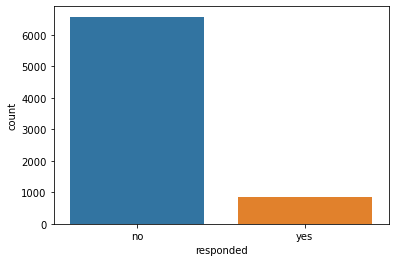

In [15]:
# Ploting the data :

sns.countplot(dat["responded"])

### The Above graph clearly shows that the customers who didnt respond to the campaign are more compared to the customers who responded to the campaign. Hence we say that this is an imbalanced class classification problem

In [16]:
# Checking the distribution of Profession columns :

dat["profession"].value_counts(normalize = True)*100

admin.           25.424872
blue-collar      22.457513
technician       16.347451
services          9.697869
management        7.229566
retired           4.140815
entrepreneur      3.709199
self-employed     3.345023
housemaid         2.522255
unemployed        2.333423
student           1.969247
unknown           0.822768
Name: profession, dtype: float64

<Figure size 720x360 with 0 Axes>

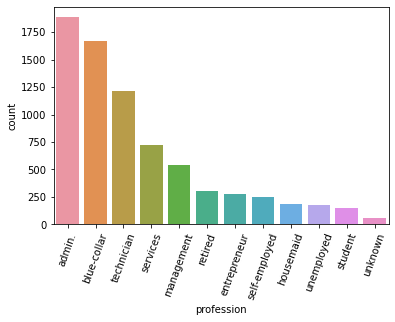

<Figure size 720x360 with 0 Axes>

In [17]:
# Ploting the Profession columns

chart = sns.countplot(dat["profession"],order = dat["profession"].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation = 70)
plt.figure(figsize = (10,5))

In [18]:
# Checking the distribution of schooling columns :

dat["schooling"].value_counts(normalize = True)

university.degree      0.500270
high.school            0.164014
basic.9y               0.105746
professional.course    0.089560
basic.4y               0.072026
basic.6y               0.037092
unknown                0.031157
illiterate             0.000135
Name: schooling, dtype: float64

In [19]:
dat_high_school = dat[dat["schooling"] == "high.school " ]
dat_high_school.shape

(0, 22)

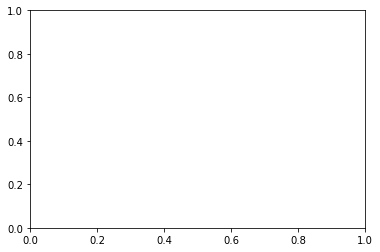

In [20]:
# Histogran Plotting

sns.histplot(dat_high_school["nr.employed"])
plt.show()

<Figure size 720x360 with 0 Axes>

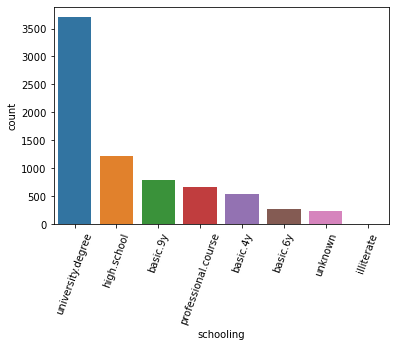

<Figure size 720x360 with 0 Axes>

In [21]:
chartS = sns.countplot(dat["schooling"],order = dat["schooling"].value_counts().index)
chartS.set_xticklabels(chartS.get_xticklabels(),rotation = 70)
plt.figure(figsize = (10,5))

In [22]:
# Checking the distribution of Contact columns :

dat["contact"].value_counts(normalize = True)

cellular     0.638117
telephone    0.361883
Name: contact, dtype: float64

<Figure size 720x360 with 0 Axes>

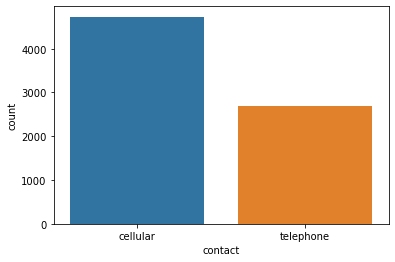

<Figure size 720x360 with 0 Axes>

In [23]:
chartC = sns.countplot(dat["contact"],order = dat["contact"].value_counts().index)
chartC.set_xticklabels(chartC.get_xticklabels(),rotation =0)
plt.figure(figsize = (10,5))

In [24]:
dat.head(2)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,40.009804,blue-collar,married,university.degree,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no


# Outlier Analysis

<AxesSubplot:xlabel='custAge'>

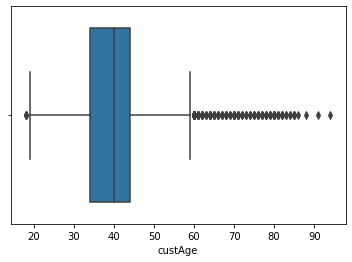

In [25]:
# Outlier Analysis for CustAge :

sns.boxplot(dat.custAge)

In [26]:
# Count of outliers :

dat[dat.custAge > 60]["custAge"].count()

141

In [27]:
#   OR 
dat[dat.custAge > 60].shape[0]

141

In [28]:
   ## OR,,Q3 = 44, Q1= 34, IQR  = (Q3-Q1) = 10 , Max = q3 +(1.5 * 10 ) = 59

In [29]:
dat[dat.custAge<20].shape[0]

8

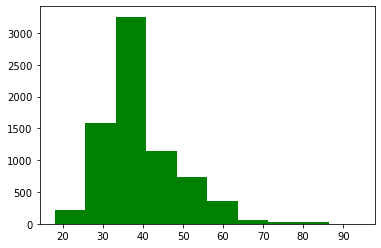

In [30]:
ax = plt.hist(dat.custAge, bins = 10,color="green")

# Bivariate Analysis :

<AxesSubplot:xlabel='contact', ylabel='count'>

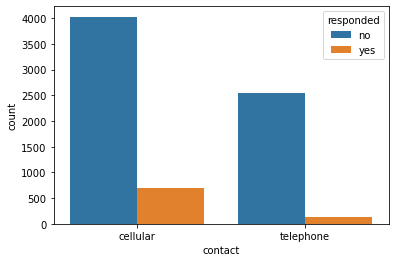

In [31]:
# Checking how many responces when the contect was cellular :

sns.countplot(x = dat.contact, hue = dat.responded)

# OR to view in x axis
#sns.countplot(x = dat.contact, hue = dat.responded)

In [32]:
dat.contact.value_counts(normalize = True)*100

cellular     63.811708
telephone    36.188292
Name: contact, dtype: float64

### customers who did not have loan responded to the campaign more than that of customers who had loan

<AxesSubplot:xlabel='marital', ylabel='count'>

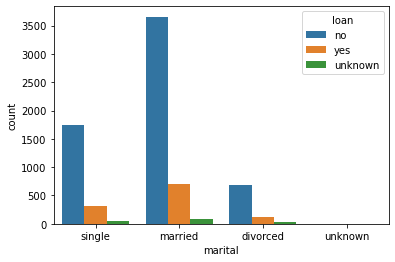

In [33]:
# try other categoral columns wrt target

sns.countplot(x=dat.marital,hue = dat.loan)


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

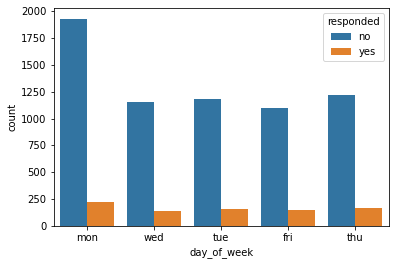

In [34]:
sns.countplot(x = dat.day_of_week, hue = dat.responded)

<AxesSubplot:xlabel='profession', ylabel='count'>

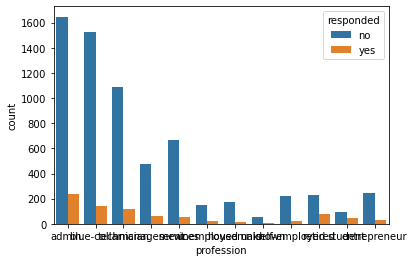

In [35]:
sns.countplot(x = dat.profession, hue = dat.responded)

<AxesSubplot:xlabel='schooling', ylabel='count'>

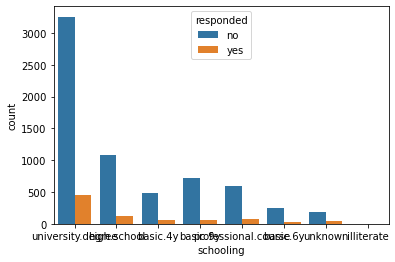

In [36]:
sns.countplot(x = dat.schooling, hue = dat.responded)

<AxesSubplot:xlabel='count', ylabel='contact'>

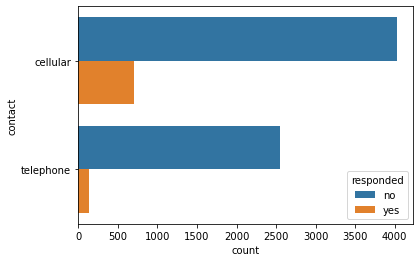

In [37]:
sns.countplot(y= dat.contact, hue = dat.responded)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

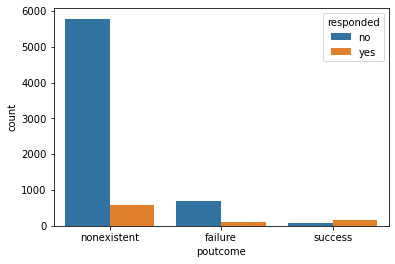

In [38]:
sns.countplot(x = dat.poutcome, hue = dat.responded)

### Conclusion of Bi-variate analysis
### We can say that there is a better response when:
    - Contacted on Monday
    - During the month of May
    - When people are married
    - When they dont have a loan
    - Profession is Admin
    - Education is University degree
    - Contacted through mobile
    - They are new customers - previous outcome was non-existant

In [39]:
### Calculate the correlation for the numeric variable



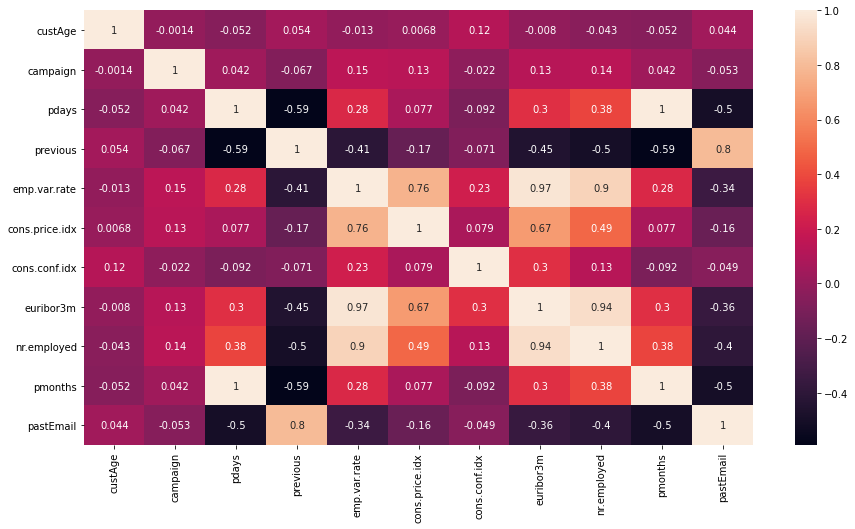

In [40]:
#Calculate the correlation for the dataset

corr = dat.corr()

# setting the size of the figure

plt.figure(figsize = (15,8))

# Plot the correlation using heatmap

ax= sns.heatmap(corr,annot = True)


### If you look at the  data, pmonths and pdays are one and the same, hence dropping one of the columns

In [41]:
dat.drop(axis=1,columns = "pmonths",inplace = True)

In [42]:
dat.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pastEmail', 'responded'],
      dtype='object')

### Encoding the Categoral variables

In [43]:
# Ordinal columns to perform label encoding :

columns_to_le = ["schooling","month","day_of_week","responded"]

# Label encoding the catagorical columns :

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in columns_to_le:
    dat[col] = le.fit_transform(dat[col])
    
    

In [44]:
#!pip install category_encoders
#!pip install statsmodels 
# ==0.10.0rc2 --pre --user

In [45]:
#pip install sklearn

In [46]:

columns_to_oe = ["default","housing","loan","profession","marital","contact","poutcome"]
#Label Encoding the Nominal categorical columns
from category_encoders import OneHotEncoder
oe = OneHotEncoder(cols = columns_to_oe)
data = oe.fit_transform(dat)

In [47]:
data.head()


,custAge,profession_1,profession_2,profession_3,profession_4,profession_5,profession_6,profession_7,profession_8,profession_9,...,poutcome_1,poutcome_2,poutcome_3,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail,responded
0,55.000000,1,0,0,0,0,0,0,0,0,...,1,0,0,-0.1,93.200,-42.0,4.191,5195.8,0,0
1,40.009804,0,1,0,0,0,0,0,0,0,...,1,0,0,1.4,93.918,-42.7,4.960,5228.1,0,0
2,42.000000,0,0,1,0,0,0,0,0,0,...,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0
3,55.000000,0,0,0,1,0,0,0,0,0,...,1,0,0,1.4,93.918,-42.7,4.962,5228.1,0,0
4,40.009804,1,0,0,0,0,0,0,0,0,...,0,1,0,-1.8,92.893,-46.2,1.291,5099.1,1,0


In [48]:
#pdays has a value 999 when not contacted before
# It is a very high value and impacts the analysis, lets replace it with -1

data['pdays'].replace(999,-1,inplace=True)
data.head(2)

,custAge,profession_1,profession_2,profession_3,profession_4,profession_5,profession_6,profession_7,profession_8,profession_9,...,poutcome_1,poutcome_2,poutcome_3,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail,responded
0,55.000000,1,0,0,0,0,0,0,0,0,...,1,0,0,-0.1,93.200,-42.0,4.191,5195.8,0,0
1,40.009804,0,1,0,0,0,0,0,0,0,...,1,0,0,1.4,93.918,-42.7,4.960,5228.1,0,0


In [49]:
#Splitting x & y

x = data.drop("responded",axis = 1)
y = data["responded"]

In [50]:
data.shape

(7414, 44)

In [51]:

    
    
# Save numerical columns in a list :


cnames =  ["custAge","campaign","pdays","previous","emp.var.rate","cons.price.idx",
         "cons.conf.idx","euribor3m","nr.employed","pastEmail"]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for col in cnames :
    x[col] = ss.fit_transform(x[[col]])



In [52]:

"""
       OR 


Col = x.select_dtypes("number")
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for col in Col :  #  col = variable, Col = List
    x[col] = ss.fit_transform(x[[col]])
"""

'\n       OR \n\n\nCol = x.select_dtypes("number")\nfrom sklearn.preprocessing import StandardScaler\nss = StandardScaler()\nfor col in Col :  #  col = variable, Col = List\n    x[col] = ss.fit_transform(x[[col]])\n'

In [53]:
x.head(2)

,custAge,profession_1,profession_2,profession_3,profession_4,profession_5,profession_6,profession_7,profession_8,profession_9,...,previous,poutcome_1,poutcome_2,poutcome_3,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail
0,1.629770e+00,1,0,0,0,0,0,0,0,0,...,-0.356294,1,0,0,-0.096978,-0.641025,-0.309429,0.348394,0.418252,-0.286848
1,7.725190e-16,0,1,0,0,0,0,0,0,0,...,-0.356294,1,0,0,0.859475,0.600533,-0.459983,0.789146,0.860089,-0.286848


# Spliting data into train and test

In [54]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0, stratify = y)



# Stratify = y,  so that 0's and 1's slpeats equally

In [55]:
n_train = len(y_train)
n_test = len(y_test)




In [56]:
print("Value count of the labels in train")
print(len(y_train[y_train==0])/n_train)
print(len(y_train[y_train==1])/n_train)




Value count of the labels in train
0.8866970156803238
0.11330298431967628


In [57]:
print("Value count of the labels in test")
print (len(y_test[y_test==0])/n_test)
print(len(y_test[y_test==1])/n_test)

Value count of the labels in test
0.8867161159811193
0.11328388401888065


In [58]:
# Here from the above we can see that the proportion opf split data in train and test are equal.


# Fitting a logistic regression model

In [59]:
from sklearn.linear_model import LogisticRegression
lregr = LogisticRegression()
lregr.fit(x_train,y_train)





LogisticRegression()

In [60]:
# Prediction

y_pred = lregr.predict(x_test)

In [61]:
# Checking the accuracy 

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, roc_curve,auc




In [62]:
accuracy_score(y_test,y_pred)

0.8975050573162509

In [63]:
f1_score(y_test,y_pred)



0.32142857142857145

In [64]:
confusion_matrix(y_test,y_pred)



array([[1295,   20],
       [ 132,   36]], dtype=int64)

In [65]:
confusion_matrix =( 1295+35)/(1298+20+133+35)
confusion_matrix

0.8950201884253028

In [66]:
accuracy_score(y_test,y_pred)

0.8975050573162509

In [67]:
probs = lregr.predict_proba(x_test)
prob_positive = probs[:,1]
fpr,tpr,threshold = roc_curve(y_test,prob_positive)
roc_auc = auc(fpr,tpr)
roc_auc



0.8035872714104654

In [68]:
# OR

import sklearn.metrics as metrics

metrics.roc_auc_score(y_test,lregr.predict_proba(x_test)[:,1])

0.8035872714104654

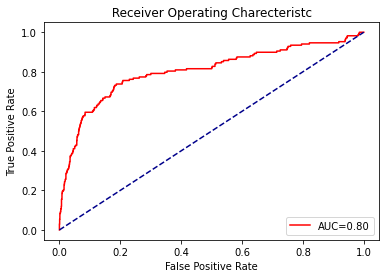

In [69]:
# Plotting 

plt.title (" Receiver Operating Charecteristc ")
plt.plot(fpr,tpr,"red",label = 'AUC=%0.2f'% roc_auc)
plt.legend(loc = "lower right")


plt.plot([0,1],[0,1],color = "darkblue", linestyle = "--") # [0,1]Start from 0 till 1
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()




# Fitting a Decision tree model


In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dectree = DecisionTreeClassifier(random_state = 0, max_depth = 3)




In [72]:
dectree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [73]:
y_predict_dtree = dectree.predict(x_test)
y_predict_dtree


array([1, 0, 0, ..., 0, 0, 0])

In [74]:
accuracy_score(y_test,y_predict_dtree)



0.8927848954821308

In [75]:


f1_score(y_test,y_predict_dtree)

0.3510204081632653

In [76]:

probs = dectree.predict_proba(x_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test,prob_positive)
roc_auc = auc(fpr,tpr)
roc_auc

0.7691788882853522

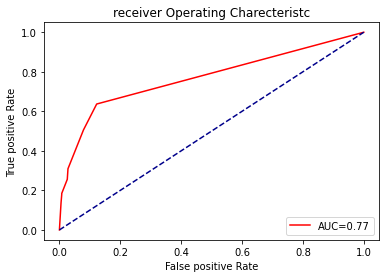

In [77]:
plt.title("receiver Operating Charecteristc")
plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show()




# Visualization of the decision Tree

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.tree as tree

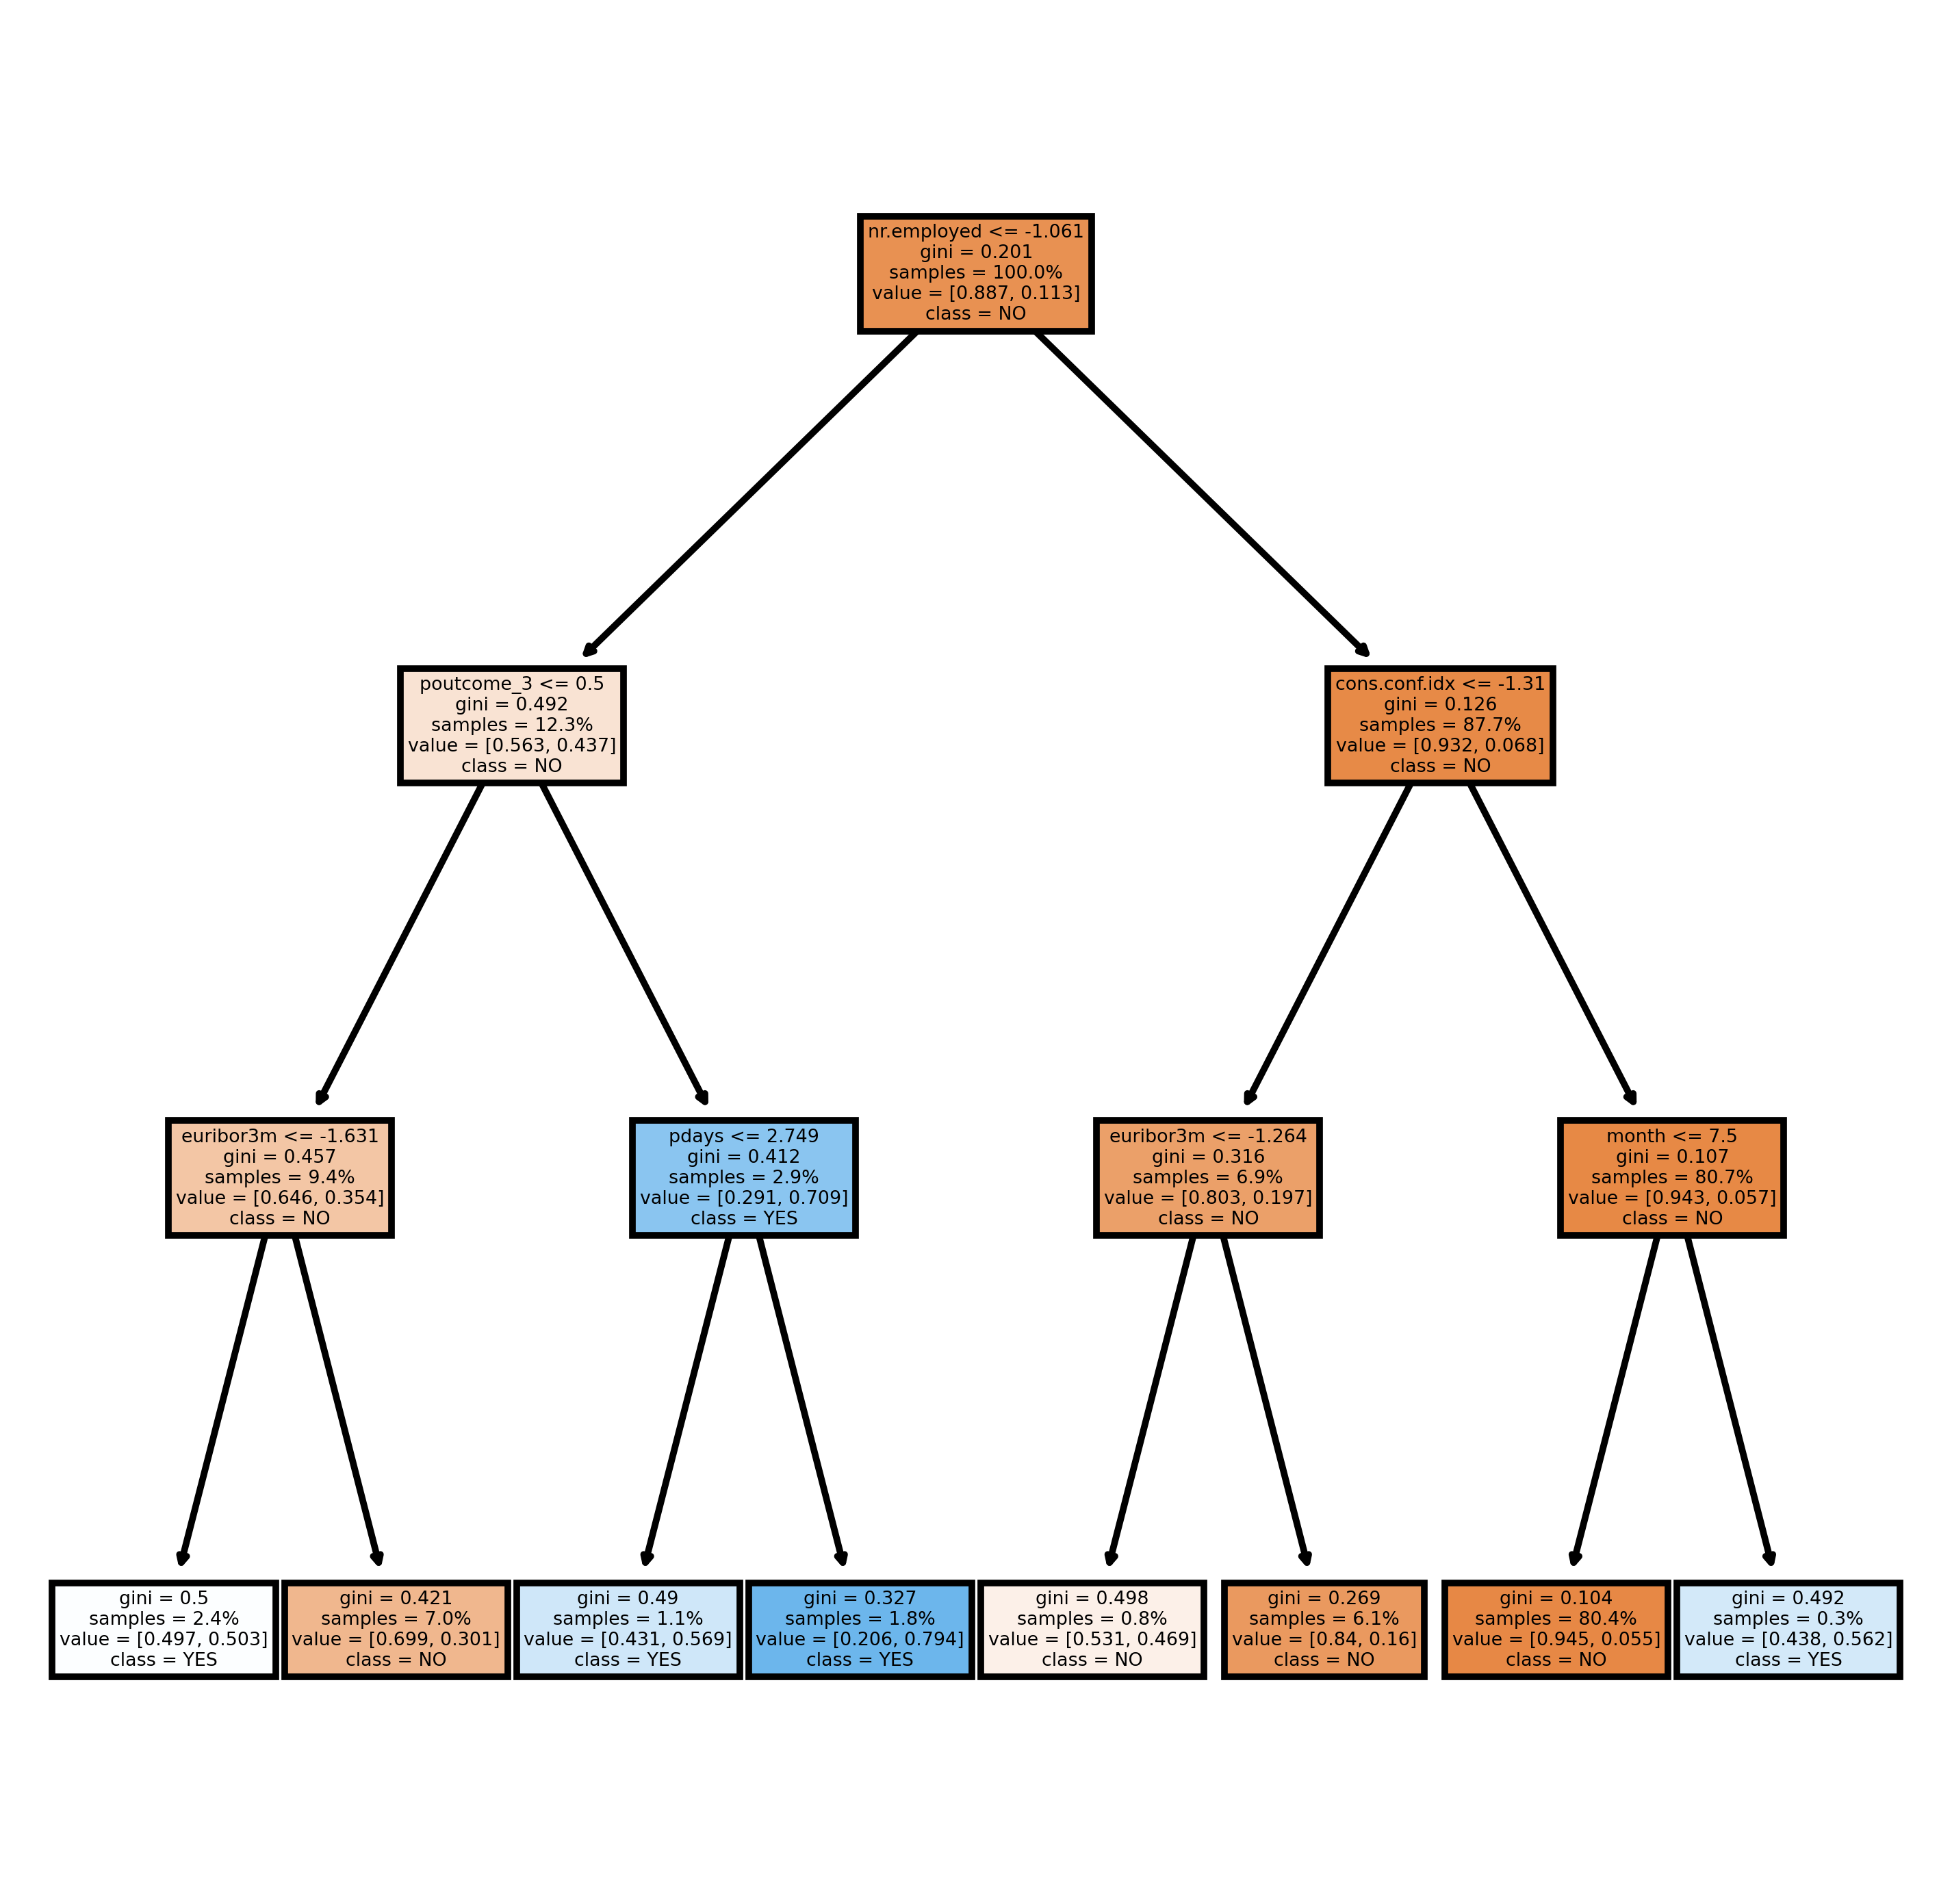

In [79]:

plt.figure(figsize = (5,5), dpi =700)
tree.plot_tree(dectree,feature_names = x_train.columns.to_list(),
               class_names = ["NO","YES"],
               filled = True, proportion = True)
plt.show()

# Features of Importance :


In [80]:
features = dectree.feature_importances_

print(features)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.03251399
 0.         0.         0.01622351 0.         0.         0.
 0.13177573 0.         0.         0.05883334 0.06753319 0.69312024
 0.        ]


In [81]:
imp_feat = pd.Series(features,index = x.columns.tolist())
imp_feat.sort_values(ascending = False)

nr.employed       0.693120
poutcome_3        0.131776
euribor3m         0.067533
cons.conf.idx     0.058833
month             0.032514
pdays             0.016224
pastEmail         0.000000
profession_9      0.000000
marital_3         0.000000
marital_2         0.000000
marital_1         0.000000
profession_12     0.000000
profession_11     0.000000
profession_10     0.000000
profession_7      0.000000
profession_8      0.000000
schooling         0.000000
profession_6      0.000000
profession_5      0.000000
profession_4      0.000000
profession_3      0.000000
profession_2      0.000000
profession_1      0.000000
marital_4         0.000000
housing_1         0.000000
default_1         0.000000
default_2         0.000000
cons.price.idx    0.000000
emp.var.rate      0.000000
poutcome_2        0.000000
poutcome_1        0.000000
previous          0.000000
campaign          0.000000
day_of_week       0.000000
contact_2         0.000000
contact_1         0.000000
loan_3            0.000000
l

# Bar Plot on feature Importance

<Figure size 1440x360 with 0 Axes>

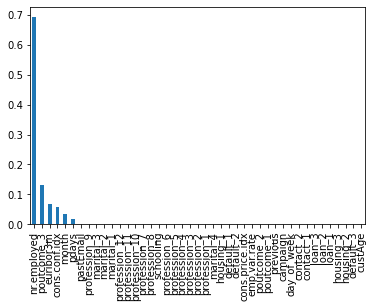

<Figure size 1440x360 with 0 Axes>

In [82]:
imp_feat = pd.Series(features,index = x.columns.tolist())
imp_feat.sort_values(ascending = False).plot(kind = "bar")

plt.figure(figsize = (20,5))


In [83]:
!pip install imblearn --user

In [84]:
import imblearn

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
print(data.responded.value_counts())



0    6574
1     840
Name: responded, dtype: int64


In [87]:
smt = SMOTE(random_state = 0) # kind of upsampling, it uses the k mean to up sample the data
x,y = smt.fit_resample(x,y)

In [88]:
y.value_counts()

1    6574
0    6574
Name: responded, dtype: int64

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify = y)

In [102]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rf= RandomForestClassifier(n_estimators = 100, criterion="entropy", random_state = 0)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [91]:
rf.score(x_test,y_test)

0.9482889733840304

In [92]:
y_pred =rf.predict(x_test)

In [93]:
type(y_test)

pandas.core.series.Series

In [94]:
y_test.values #Checking the values/ elements in a series

array([1, 1, 1, ..., 1, 1, 0])

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1249,   66],
       [  70, 1245]], dtype=int64)

In [99]:
CM = (1249+1245)/(1249+1245+70+66)
CM

0.9482889733840304

In [103]:
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [104]:
Precision = (TP/(TP+FP))
recall = (TP/(FN+TP))
f1score = 2*(Precision*recall)/(Precision+recall)
print(Precision,recall,f1score)

0.9496567505720824 0.9467680608365019 0.9482102056359482


In [106]:
f1_score(y_test,rf.predict(x_test))

0.9482102056359482

In [108]:
probs = rf.predict_proba(x_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test,prob_positive)
roc_auc = auc(fpr,tpr)
roc_auc

0.9838285937341873